## Load Libraries

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(viridis)
    library(tradeSeq)
    library(reshape2)
    library(tidyr)
    #library(clusterExperiment)
    library(Cairo)
    library(ggridges)
    library(grid)
    library(png)
})

In [2]:
# Define the number of colors you want (e.g., 100)
n_colors <- 100
color <- plasma

# Get the Viridis color palette
palette <- color(n_colors)

# Invert the gradient by reversing the order of colors
inverted_palette <- rev(palette)

## Load in R Scripts

In [3]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

lapply(script_files, source)

list()

## Data Locations

In [4]:
##### Load in Seurat Objects #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory


io$gastruloids = file.path(io$main, "projects/13_gastruloid_datasets/datasets/GSE158999_seurat_object/cardiovascular_gastruloids_seurat.Rds")
io$gastruloids_meta = file.path(io$main, "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/merged_query_meta.Rds")



##### Load in the refined annotations and final metadata #####
io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$FINAL_REFINED_ANNOTATIONS = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/1B_FINAL_REFINED_ANNOTATIONS_REVISIONS_POST_REVISION.Rds")

In [5]:
# Set the working directory
setwd(io$main)

## Load in the Gastruloid Data

In [6]:
# load in the query dataset 
gastruloids = readRDS(io$gastruloids)
gastruloids_meta = readRDS(io$gastruloids_meta)

rownames(gastruloids_meta) <- gastruloids_meta$cell_ID
gastruloids <- AddMetaData(gastruloids, metadata = gastruloids_meta)

## Load in the Atlas Data

In [7]:
# load in the atlas dataset 
atlas = readRDS(io$atlas)
atlas_meta = readRDS(io$FINAL_REFINED_ANNOTATIONS)

In [8]:
atlas <- AddMetaData(atlas, metadata = atlas_meta)

In [9]:
colnames(gastruloids@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "Dataset"                "batch"                  "percent.mito"          
 [7] "celltype"               "Replicate"              "stage"                 
[10] "louvain_clusters"       "UMAP_1"                 "UMAP_2"                
[13] "harmony_1"              "harmony_2"              "harmony_3"             
[16] "harmony_4"              "harmony_5"              "harmony_6"             
[19] "harmony_7"              "harmony_8"              "harmony_9"             
[22] "harmony_10"             "harmony_11"             "harmony_12"            
[25] "harmony_13"             "harmony_14"             "harmony_15"            
[28] "harmony_16"             "harmony_17"             "harmony_18"            
[31] "harmony_19"             "harmony_20"             "harmony_21"            
[34] "harmony_22"             "harmony_23"             "harmony_24"            
[37] "harmony_25"             "harmony_26"             "harmony_27"            
[40] "harmony_28"             "harmony_29"             "harmony_30"            
[43] "doublet_score"          "pijuansala_transfer"    "cellID"                
[46] "cell_ID"                "AP"                     "DV"                    
[49] "joint_clusters_pass_QC" "refined_annotation"     "dim1"                  
[52] "dim2"                   "embryo"                 "nearest_cell"          
[55] "nearest_cell_seqFISH"   "dataset"

In [10]:
colnames(atlas@meta.data)

[1] "orig.ident"                                          
 [2] "nCount_originalexp"                                  
 [3] "nFeature_originalexp"                                
 [4] "cell"                                                
 [5] "sample"                                              
 [6] "embryo_version"                                      
 [7] "stage"                                               
 [8] "somite_count"                                        
 [9] "anatomy"                                             
[10] "S_score"                                             
[11] "G2M_score"                                           
[12] "phase"                                               
[13] "louvain"                                             
[14] "leiden"                                              
[15] "celltype_PijuanSala2019"                             
[16] "celltype_extended_atlas"                             
[17] "sizeFactor"                                          
[18] "stage_updated"                                       
[19] "within_timepoint_integration_snn_res.2"              
[20] "seurat_clusters"                                     
[21] "originalexp_snn_res.2"                               
[22] "within_atlas_version_integration_snn_res.2"          
[23] "cell_ID"                                             
[24] "nCount_RNA"                                          
[25] "nFeature_RNA"                                        
[26] "seqFISH_celltype"                                    
[27] "extended_atlas_celltype"                             
[28] "AP"                                                  
[29] "DV"                                                  
[30] "dataset"                                             
[31] "cluster"                                             
[32] "subcluster"                                          
[33] "cluster_subcluster"                                  
[34] "UMAP_1"                                              
[35] "UMAP_2"                                              
[36] "majority_seqFISH_celltype"                           
[37] "majority_seqFISH_celltype_proportion"                
[38] "majority_extended_atlas_celltype"                    
[39] "majority_extended_atlas_celltype_proportion"         
[40] "majority_celltype_PijuanSala2019_celltype"           
[41] "majority_celltype_PijuanSala2019_celltype_proportion"
[42] "stage_transfer"                                      
[43] "poor_stage_alignment"                                
[44] "proportion_seqFISH_cells_per_subcluster"             
[45] "joint_clusters_pass_QC"                              
[46] "stage_alignment_pass_QC"                             
[47] "passed_QC"                                           
[48] "refined_annotation"                                  
[49] "embryo"

## Filter the Seurat Objects to Only Include Somitic Tissues

In [11]:
filter_seurat_object <- function(seurat_obj, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X) {
  
  # Subset the Seurat object
  seurat_subset <- subset(seurat_obj, 
                          subset = refined_annotation %in% celltype_to_include &
                                   joint_clusters_pass_QC == TRUE &
                                   AP >= min_AP & AP <= max_AP &
                                   DV >= min_DV & DV <= max_DV)
  
  # Get the metadata including the "refined_annotation"
  metadata <- seurat_subset@meta.data
  
  # Count the number of cells in each "refined_annotation" group
  annotation_counts <- table(metadata$refined_annotation)
  
  # Filter for annotations with X or more cells
  valid_annotations <- names(annotation_counts[annotation_counts >= X])
  
  # Subset the Seurat object based on the valid annotations
  seurat_filtered <- subset(seurat_subset, subset = refined_annotation %in% valid_annotations)
  
  # Return the filtered Seurat object
  return(seurat_filtered)
}

In [12]:
# Example usage:
# Define parameters
somitic_ss <- c("Anterior somitic tissues", "Posterior somitic tissues", "Dermomyotome", "Sclerotome", "Endotome", "Somitic mesoderm")

#embryos_to_include <- c("embryo_5", "embryo_6", "embryo_7")
celltype_to_include <- somitic_ss
min_AP <- 0
max_AP <- 100
min_DV <- 0 
max_DV <- 100
X <- 10 

# Call the function
gastruloids_filtered <- filter_seurat_object(gastruloids, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X)
atlas_filtered <- filter_seurat_object(atlas, celltype_to_include, min_AP, max_AP, min_DV, max_DV, X)

In [13]:
table(gastruloids_filtered@meta.data$refined_annotation)
table(atlas_filtered@meta.data$refined_annotation)


 Anterior somitic tissues              Dermomyotome                  Endotome 
                       62                       335                      1110 
Posterior somitic tissues                Sclerotome          Somitic mesoderm 
                      784                      2901                       309 


 Anterior somitic tissues              Dermomyotome                  Endotome 
                      828                       845                      1239 
Posterior somitic tissues                Sclerotome          Somitic mesoderm 
                      679                      2810                       402 

In [14]:
# Assuming your data frame is called df
gastruloids_filtered@meta.data <- gastruloids_filtered@meta.data %>%
  mutate(refined_annotation = case_when(
    refined_annotation %in% c("Anterior somitic tissues", "Posterior somitic tissues", "Dermomyotome", "Sclerotome", "Endotome", "Somitic mesoderm") ~ "Somitic",
    TRUE ~ refined_annotation  # Keep the remaining names unchanged
  ))

atlas_filtered@meta.data <- atlas_filtered@meta.data %>%
  mutate(refined_annotation = case_when(
    refined_annotation %in% c("Anterior somitic tissues", "Posterior somitic tissues", "Dermomyotome", "Sclerotome", "Endotome", "Somitic mesoderm") ~ "Somitic",
    TRUE ~ refined_annotation  # Keep the remaining names unchanged
  ))

In [15]:
table(gastruloids_filtered@meta.data$refined_annotation)
table(atlas_filtered@meta.data$refined_annotation)


Somitic 
   5501 


Somitic 
   6803 

## Determine Highly Variable Gene Set to Explore Along AP Axis

In [16]:
## Find Variable Features to Restrict which Genes are Explored in TRADESEQ
DefaultAssay(gastruloids_filtered) <- "RNA"
number_features <- 2000
gastruloids_filtered <- FindVariableFeatures(gastruloids_filtered, nfeatures = number_features, assay = "RNA")
gastruloids_var_features <- VariableFeatures(gastruloids_filtered)

In [17]:
## Find Variable Features to Restrict which Genes are Explored in TRADESEQ
DefaultAssay(atlas_filtered) <- "originalexp"
number_features <- 2000
atlas_filtered <- FindVariableFeatures(atlas_filtered, nfeatures = number_features, assay = "originalexp")
atlas_var_features <- VariableFeatures(atlas_filtered)

In [18]:
# Save var_features to a specific file location
saveRDS(gastruloids_var_features, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_4/output/gastruloids_var_features_somitic.rds")
saveRDS(atlas_var_features, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_4/output/atlas_var_features_somitic.rds")

In [19]:
overlapping_genes_gastruloids_scRNA <- intersect(rownames(gastruloids_filtered), rownames(atlas_filtered))

In [20]:
total_var <- unique(c(atlas_var_features, gastruloids_var_features))

In [21]:
final_genes_to_use <- intersect(total_var, overlapping_genes_gastruloids_scRNA)

In [22]:
str(final_genes_to_use)

 chr [1:2821] "Etv2" "Ripply2" "Hba-x" "Hbb-bh1" "Mt1" "Tagln" "Acta2" ...


In [23]:
saveRDS(final_genes_to_use, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_4/output/var_features_final_intersect_for_tradeseq.rds")

In [24]:
 #Check if all elements are unique
length(final_genes_to_use) == length(unique(final_genes_to_use))  # Returns TRUE if all elements are unique, FALSE otherwise

[1] TRUE

## TRADESEQ PIPELINE

### Generate matrices for fitGAM

In [25]:
generate_matrices <- function(seqFISH_filtered, AP_column) {
  
  # Generate the counts matrix
  counts <- seqFISH_filtered@assays$RNA@counts
  
  #### Generate the pseudotime matrix ####
  pseudotime <- seqFISH_filtered@meta.data %>%
    select(all_of(AP_column), refined_annotation)
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(pseudotime$refined_annotation)
  
  # Loop over each unique cell type to create a new column
  for (cell_type in unique_cell_types) {
    # Create a new column name based on the cell type
    new_column_name <- paste("lineage", cell_type, sep = "_")
    
    # Populate the new column with the AP values (same for all rows)
    pseudotime[[new_column_name]] <- pseudotime[[AP_column]]
  }
  
  # Remove the original AP and refined_annotation columns
  pseudotime <- pseudotime[, !(names(pseudotime) %in% c(AP_column, "refined_annotation"))]
  
  # Now pseudotime contains the AP values repeated in each new lineage column
  
  ### Generate the cell weights matrix ###
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(seqFISH_filtered@meta.data$refined_annotation)
  
  # Initialize a matrix with dimensions: number of cells x number of unique cell types
  cell_weights <- matrix(0, nrow = nrow(seqFISH_filtered@meta.data), ncol = length(unique_cell_types))
  
  # Generate the column names with the same naming convention as in pseudotime
  colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
  rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  
  # Populate the matrix with 1s where the cell belongs to the lineage
  for (i in 1:length(unique_cell_types)) {
    cell_weights[, i] <- ifelse(seqFISH_filtered@meta.data$refined_annotation == unique_cell_types[i], 1, 0)
  }
  
  # If there is only one unique cell type, set all values to 1
  if (length(unique_cell_types) == 1) {
    cell_weights <- matrix(1, nrow = nrow(seqFISH_filtered@meta.data), ncol = 1)
    colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
    rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  }
  
  # Return the generated matrices as a list
  return(list(counts = counts, pseudotime = pseudotime, cell_weights = cell_weights))
}

In [26]:
generate_matrices <- function(seqFISH_filtered, AP_column, assay_slot = "RNA") {
  
  # Generate the counts matrix dynamically based on the specified assay slot
  counts <- seqFISH_filtered@assays[[assay_slot]]@counts
  
  #### Generate the pseudotime matrix ####
  pseudotime <- seqFISH_filtered@meta.data %>%
    select(all_of(AP_column), refined_annotation)
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(pseudotime$refined_annotation)
  
  # Loop over each unique cell type to create a new column
  for (cell_type in unique_cell_types) {
    # Create a new column name based on the cell type
    new_column_name <- paste("lineage", cell_type, sep = "_")
    
    # Populate the new column with the AP values (same for all rows)
    pseudotime[[new_column_name]] <- pseudotime[[AP_column]]
  }
  
  # Remove the original AP and refined_annotation columns
  pseudotime <- pseudotime[, !(names(pseudotime) %in% c(AP_column, "refined_annotation"))]
  
  # Now pseudotime contains the AP values repeated in each new lineage column
  
  ### Generate the cell weights matrix ###
  
  # Get the unique cell types from the refined_annotation column
  unique_cell_types <- unique(seqFISH_filtered@meta.data$refined_annotation)
  
  # Initialize a matrix with dimensions: number of cells x number of unique cell types
  cell_weights <- matrix(0, nrow = nrow(seqFISH_filtered@meta.data), ncol = length(unique_cell_types))
  
  # Generate the column names with the same naming convention as in pseudotime
  colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
  rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  
  # Populate the matrix with 1s where the cell belongs to the lineage
  for (i in 1:length(unique_cell_types)) {
    cell_weights[, i] <- ifelse(seqFISH_filtered@meta.data$refined_annotation == unique_cell_types[i], 1, 0)
  }
  
  # If there is only one unique cell type, set all values to 1
  if (length(unique_cell_types) == 1) {
    cell_weights <- matrix(1, nrow = nrow(seqFISH_filtered@meta.data), ncol = 1)
    colnames(cell_weights) <- paste("lineage", unique_cell_types, sep = "_")
    rownames(cell_weights) <- rownames(seqFISH_filtered@meta.data)
  }
  
  # Return the generated matrices as a list
  return(list(counts = counts, pseudotime = pseudotime, cell_weights = cell_weights))
}

## TRADESEQ FOR GASTRULOIDS

In [27]:
 result <- generate_matrices(gastruloids_filtered, "AP")
 counts <- result$counts
 pseudotime <- result$pseudotime
 cell_weights <- result$cell_weights

head(pseudotime)

[1] 21.05099 16.66913 17.50072 55.17852 25.56884 48.28095

In [27]:
# Fit GAM model
sce_GAM <- fitGAM(counts = counts, 
                  pseudotime = pseudotime, 
                  cellWeights = cell_weights,
                  genes = final_genes_to_use,
                  nknots = 6, 
                  verbose = TRUE)

# Save sce_GAM to a specific file location
saveRDS(sce_GAM, file = "pprojects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_4/output/sce_GAM_AP_gastruloid_somitic.rds")

# Within lineage comparisons, test for all lineages independently
assoRes <- associationTest(sce_GAM, lineages = TRUE)

# Save assoRes to a specific file location
saveRDS(assoRes, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/fig_4/output/assoRes_AP_gastruloid_somitic.rds")

sce_GAM_gastruloid <- sce_GAM
assoRes_gastruloid <- assoRes

[1] 21.05099 16.66913 17.50072 55.17852 25.56884 48.28095

## TRADESEQ FOR scRNA

In [28]:
 result <- generate_matrices(atlas_filtered, "AP", assay_slot = "originalexp")
 counts <- result$counts
 pseudotime <- result$pseudotime
 cell_weights <- result$cell_weights

head(pseudotime)

# Fit GAM model
sce_GAM <- fitGAM(counts = counts, 
                  pseudotime = pseudotime, 
                  cellWeights = cell_weights,
                  genes = final_genes_to_use,
                  nknots = 6, 
                  verbose = TRUE)

# Save sce_GAM to a specific file location
saveRDS(sce_GAM, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/Figure_4_Tradeseq/sce_GAM_AP_scRNA_somitic.rds")

# Within lineage comparisons, test for all lineages independently
assoRes <- associationTest(sce_GAM, lineages = TRUE)

# Save assoRes to a specific file location
saveRDS(assoRes, file = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/Figure_4_Tradeseq/assoRes_AP_scRNA_somitic.rds")

sce_GAM_scRNA <- sce_GAM
assoRes_scRNA <- assoRes

[1] 63.51699 73.62587 75.56596 74.91598 84.02810 69.97658

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


## Find genes that change along AP in both scRNA and gastruloids

In [29]:
assoRes_gastruloid$dataset <- "gastruloid"

In [30]:
assoRes_scRNA$dataset <- "scRNA"

In [31]:
assoRes_scRNA_filtered <- assoRes_scRNA %>% 
  filter(pvalue_1 < 0.05 & meanLogFC >= log2(1.5))

assoRes_gastruloids_filtered <- assoRes_gastruloid %>% 
  filter(pvalue_1 < 0.05 & meanLogFC >= log2(1.5))

In [32]:
commonly_changing_AP <- intersect(rownames(assoRes_scRNA_filtered),rownames(assoRes_gastruloids_filtered))

In [33]:
str(commonly_changing_AP)

 chr [1:870] "Ripply2" "Tagln" "Acta2" "Mesp2" "Myl7" "Phlda2" "Mesp1" ...


## Generate Heatmap for scRNA and for gastruloids (with genes (rows) in the same order)

In [34]:
ysmooth_scRNA <- predictSmooth(models = sce_GAM_scRNA, gene = commonly_changing_AP, nPoints = 100, tidy = FALSE)
ysmooth_gastruloids <- predictSmooth(models = sce_GAM_gastruloid, gene = commonly_changing_AP, nPoints = 100, tidy = FALSE)


ysmooth_scRNA_scaled <- t(apply(ysmooth_scRNA, 1, scale))
ysmooth_gastruloids_scaled <- t(apply(ysmooth_gastruloids, 1, scale))

In [35]:
head(ysmooth_scRNA_scaled)

Ripply2,6.6727738,4.8591623,3.5202541,2.53217513,1.80312751,1.26518981,0.86817405,0.5750372,0.35846325,0.19832268,...,-0.26760781,-0.26762457,-0.2676373,-0.2676469,-0.2676540,-0.2676593,-0.2676632,-0.2676660,-0.2676680,-0.2676695
Tagln,-0.6023889,-0.6014021,-0.6004010,-0.59938530,-0.59835449,-0.59730815,-0.59624587,-0.5951672,-0.59407160,-0.59295866,...,1.65927568,1.82451433,2.0008516,2.1890700,2.3900157,2.6046055,2.8338326,3.0787747,3.3406015,3.6205844
Acta2,0.2960515,0.2260255,0.1606043,0.09953538,0.04257301,-0.01052105,-0.05997672,-0.1060150,-0.14884768,-0.18867695,...,1.62467832,1.80313591,1.9923122,2.1929732,2.4059810,2.6323064,2.8730432,3.1294243,3.4028404,3.6948605
Mesp2,7.5088476,4.8133878,3.0597615,1.91956760,1.17817373,0.69574246,0.38138621,0.1761334,0.04176031,-0.04649955,...,-0.22301135,-0.22293599,-0.2228535,-0.2227632,-0.2226644,-0.2225564,-0.2224382,-0.2223090,-0.2221677,-0.2220133
Myl7,-0.5074796,-0.5151876,-0.5226509,-0.52985776,-0.53679852,-0.54346524,-0.54985161,-0.5559528,-0.56176513,-0.56728608,...,1.71352941,1.86776822,2.0305496,2.2024136,2.3839480,2.5757933,2.7786482,2.9932757,3.2205090,3.4612598
Phlda2,5.1556794,4.3118867,3.5896539,2.97238032,2.44544836,1.99606194,1.61307773,1.2868366,1.00900074,0.77239879,...,-0.03329644,-0.09645332,-0.1576483,-0.2159955,-0.2708554,-0.3218096,-0.3686303,-0.4112468,-0.4497132,-0.4841769


In [36]:
head(ysmooth_gastruloids_scaled)

Ripply2,4.4155986,3.9171911,3.4693186,3.0663785,2.7034924,2.3764008,2.0813748,1.8151408,1.5748166,1.3578570,...,-0.4417362,-0.4417704,-0.4418002,-0.4418262,-0.4418488,-0.4418682,-0.4418850,-0.4418994,-0.44191178,-0.44192236
Tagln,-1.0362445,-1.0292670,-1.0222032,-1.0150468,-1.0077917,-1.0004312,-0.9929584,-0.9853662,-0.9776471,-0.9697935,...,1.6900778,1.7705834,1.8529788,1.9373143,2.0236424,2.1120169,2.2024936,2.2951302,2.38998623,2.48712332
Acta2,3.8167860,3.4847049,3.1764691,2.8905625,2.6255351,2.3800049,2.1526583,1.9422506,1.7476051,1.5676121,...,-0.5098738,-0.4743490,-0.4339206,-0.3879849,-0.3358783,-0.2768778,-0.2102028,-0.1350205,-0.05045366,0.04440681
Mesp2,4.8601156,4.1900877,3.6049528,3.0936361,2.6465957,2.2555948,1.9135105,1.6141720,1.3522239,1.1230109,...,-0.3998442,-0.3998620,-0.3998802,-0.3998987,-0.3999174,-0.3999362,-0.3999550,-0.3999739,-0.39999261,-0.40001119
Myl7,-0.6180721,-0.6202888,-0.6224167,-0.6244568,-0.6264102,-0.6282782,-0.6300624,-0.6317646,-0.6333866,-0.6349304,...,1.8924714,1.9718506,2.0493047,2.1250873,2.1995131,2.2729563,2.3458489,2.4186800,2.49199486,2.56639621
Phlda2,4.9498285,4.2315442,3.6083635,3.0684562,2.6012468,2.1973350,1.8484081,1.5471479,1.2871389,1.0627768,...,-0.4814627,-0.4862573,-0.4907502,-0.4949286,-0.4987882,-0.5023313,-0.5055658,-0.5085037,-0.51116008,-0.51355214


In [37]:
dim(ysmooth_scRNA_scaled)

[1] 870 100

In [38]:
ysmooth_scaled <- cbind(ysmooth_scRNA_scaled, ysmooth_gastruloids_scaled)

In [39]:
head(ysmooth_scaled)

Ripply2,6.6727738,4.8591623,3.5202541,2.53217513,1.80312751,1.26518981,0.86817405,0.5750372,0.35846325,0.19832268,...,-0.4417362,-0.4417704,-0.4418002,-0.4418262,-0.4418488,-0.4418682,-0.4418850,-0.4418994,-0.44191178,-0.44192236
Tagln,-0.6023889,-0.6014021,-0.6004010,-0.59938530,-0.59835449,-0.59730815,-0.59624587,-0.5951672,-0.59407160,-0.59295866,...,1.6900778,1.7705834,1.8529788,1.9373143,2.0236424,2.1120169,2.2024936,2.2951302,2.38998623,2.48712332
Acta2,0.2960515,0.2260255,0.1606043,0.09953538,0.04257301,-0.01052105,-0.05997672,-0.1060150,-0.14884768,-0.18867695,...,-0.5098738,-0.4743490,-0.4339206,-0.3879849,-0.3358783,-0.2768778,-0.2102028,-0.1350205,-0.05045366,0.04440681
Mesp2,7.5088476,4.8133878,3.0597615,1.91956760,1.17817373,0.69574246,0.38138621,0.1761334,0.04176031,-0.04649955,...,-0.3998442,-0.3998620,-0.3998802,-0.3998987,-0.3999174,-0.3999362,-0.3999550,-0.3999739,-0.39999261,-0.40001119
Myl7,-0.5074796,-0.5151876,-0.5226509,-0.52985776,-0.53679852,-0.54346524,-0.54985161,-0.5559528,-0.56176513,-0.56728608,...,1.8924714,1.9718506,2.0493047,2.1250873,2.1995131,2.2729563,2.3458489,2.4186800,2.49199486,2.56639621
Phlda2,5.1556794,4.3118867,3.5896539,2.97238032,2.44544836,1.99606194,1.61307773,1.2868366,1.00900074,0.77239879,...,-0.4814627,-0.4862573,-0.4907502,-0.4949286,-0.4987882,-0.5023313,-0.5055658,-0.5085037,-0.51116008,-0.51355214


### Generate Heatmap

In [40]:
genes_to_highlight_from_vanderbrink <- c("Ptn", "Rab3il1", "Klf3", "Tbx18", "Mesp2", "Aldh1a2", "Meox1",
                                        "Uncx4.1", "Pax3", "Dll1", "Fgf8", "Fgf17", "Nkx1-2", "Wnt3a", "Tbx6", "T", "Sox2",
                                        "Pax3", "Klf3", "Cdx2", "Rspo3")

In [41]:
# Step 3: Create a row label vector where only highlighted genes are labeled, others are empty strings
row_labels <- ifelse(rownames(ysmooth_scaled) %in% genes_to_highlight_from_vanderbrink, rownames(ysmooth_scaled), "")

# Create an annotation data frame for highlighting rows
highlight_rows <- ifelse(rownames(ysmooth_scaled) %in% genes_to_highlight_from_vanderbrink, "Highlight", "Other")
highlight_annotation <- data.frame(Gene_Highlight = factor(highlight_rows))
rownames(highlight_annotation) <- rownames(ysmooth_scaled)

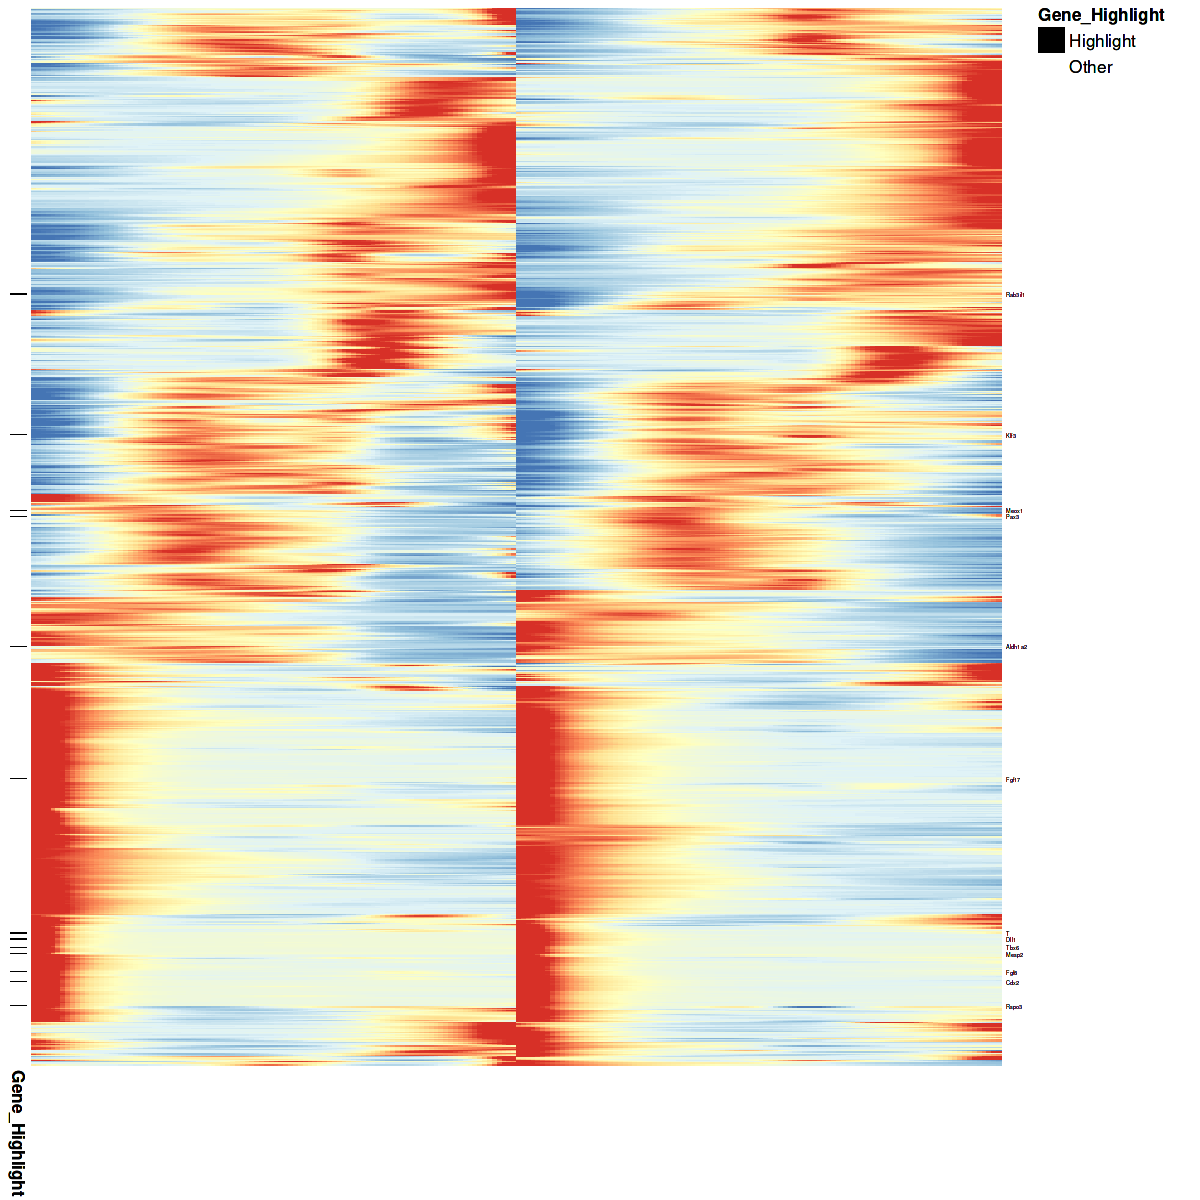

In [42]:
# Step 4: Modify the heatmap to use `row_labels` for selectively showing gene names
heatmap_plot <- pheatmap(ysmooth_scaled,
                         cluster_rows = TRUE,  
                         cluster_cols = FALSE,  
                         border_color = NA,
                         legend = FALSE,
                         display_numbers = FALSE,
                         breaks = seq(-2, 2, length.out = 101),
                         show_colnames = FALSE,
                         labels_row = row_labels,  # Use row_labels to selectively show gene names
                         annotation_row = highlight_annotation,  # Add annotation for highlighting rows
                         annotation_colors = list(Gene_Highlight = c("Highlight" = "black", "Other" = "white")),  # Color the highlighted rows in red
                         fontsize_row = 3,
                         treeheight_row = 0  # No need for tree height if no clusters are cut
                        )

# Display the heatmap_plot
wi <- 10
he <- 10

options(repr.plot.width=wi, repr.plot.height=he)
heatmap_plot 

# set the output directory
output_dir = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/Figure_4_Tradeseq/"

# set the filename
    file_name <- paste0("tradeseq_AP","heatmap","somitic_tissues",
                       ".pdf")

# Save the grid plot as .svg file to specific file path
 ggsave(filename = file.path(output_dir, file_name), plot = heatmap_plot, device = "pdf",
      width = wi,
      height = he)